Linear Regression

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
# Generate x, y co-ordinates using a generic line function and add some noise

Y_given= []
Y_true = []
X_given = []

m = random.choice([1,-1])*random.random()*7
c = random.choice([1,-1])*random.random()*23 + random.choice([1,-1])*random.random()*19

for i in range (-50,51,1):
    x = i/10
    y = m*x - c
    X_given.append([x])
    Y_true.append(y)
    noise = math.ceil(17*random.random())
    y += random.choice([1,-1])*noise
    Y_given.append(y)
    
print (m,c)
X_given = np.array(X_given)
Y_given = np.array(Y_given)
Y_true = np.array(Y_true)

3.241288009775847 19.948270176970635


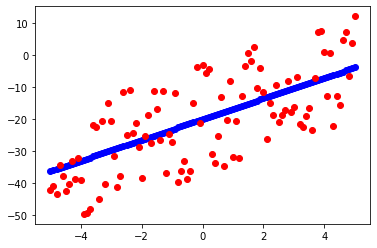

In [3]:
plt.scatter(X_given, Y_true, c ="blue")
plt.scatter(X_given, Y_given, c ="red")
plt.show()

In [4]:
# Loss function for mean squared error

def loss_function(w, b, x_data, y):
    '''
    Calculate Loss function for given weights, bias, inputs and expected output
    
    w (np.ndarray) = weights
    b (float / int) = calculated bias
    x_data (np.ndarray) =  datapoints x
    y (np.1darray) = expected output
    
    returns
    calc_loss = calculated mean squared error for all datapoints
    '''
    tot_loss = 0
    
    for idxi,i in enumerate(x_data):

        loss = ( (np.dot(np.transpose(w),i) + b) - y[idxi] ) ** 2
        tot_loss += loss
    
    return tot_loss / float(len(x_data))

loss_function(
    np.array([2,2]), 
    30, 
    np.array([[2,3],[4,5],[6,7]]), 
    np.array([40,50,60])
)

6.666666666666667

In [5]:
def grad_descent(w_now, b_now, x_data, y_labels, step_size):
    '''
    function to calculate 
    
    w_now (np.ndarray) = weights at current point of time
    b_now (np.ndarray) = bias at current point of time
    x_data (np.ndarray) = data points
    y_labels (np.ndarray) = expected output
    step_size = step_size for the iteration
    
    returns
    corrected_weights, corrected_bias
    
    '''
    
    new_weights = np.zeros(w_now.shape)
    new_bias = 0
    
    num_iter = len(x_data)
    
    for i in range(num_iter):
        x = x_data[i]
        y = y_labels[i]
        
        new_weights += -(2/num_iter) * x * (y - (w_now @ x + b_now))
        new_bias += -(2/num_iter) * (y - (w_now @ x + b_now))
        
    
    b_corr = b_now - new_bias*step_size
    w_corr = w_now - new_weights*step_size
    
    return w_corr, b_corr

In [6]:
import matplotlib.colors as mcolors
def plot(wx,bx,num,al):
    color_list = list(mcolors.CSS4_COLORS.keys())
    random.shuffle(color_list)
    plt.scatter(X_given, Y_given, c ="blue")
    plt.scatter(X_given, [wx*i+bx for i in X_given], c =color_list[num], alpha = al)
    plt.scatter(X_given, Y_true, c ="green")

Epoch =  0
[3.53083884] -20.5208031156124
3.241288009775847 19.948270176970635


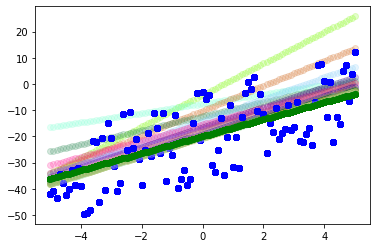

In [7]:
w = np.zeros(X_given[0].shape)
b = 0
step_size = 0.1
epochs = 20
loss = []

for i in range(epochs):
    if i % 100 == 0:
        print ('Epoch = ',i)
        
    w,b = grad_descent(w,b,X_given,Y_given,step_size)
    plot(w,b,i,0.2)
    
    l = loss_function(w, b, X_given, Y_given)
    loss.append( [i,l])
    
print (w,b)
print (m,c)


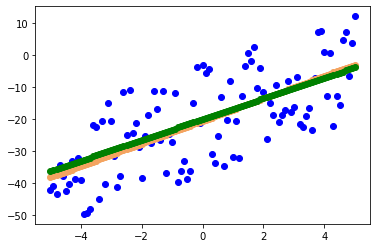

In [8]:
plot(w,b,20,1)

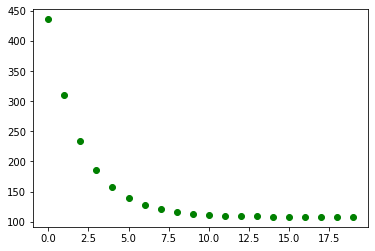

In [9]:
l_x = [x[0] for x in loss]
l_y = [x[1] for x in loss]
plt.scatter(l_x,l_y, c ="green")
plt.show()

In [10]:
# Boston Housing data set

# # Standard library imports.
# import random as rand

# # Related third party imports.
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split 

# # Local application/library specific imports.
# # import here if you write .py script 

# names = [
#     'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
#     'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
# ]

# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
#                  header=None,delim_whitespace=True,names=names,na_values='?')

# normalized_df=(df-df.min())/(df.max()-df.min())
# print(normalized_df)

# X_given = normalized_df [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
#     'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].to_numpy()
# Y_given = normalized_df[['PRICE']].to_numpy()